# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [108]:
import pandas as pd

In [109]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [110]:
temp =  pd.read_csv("Temp_States.csv")

#### Print `temp`

In [111]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [112]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes


In [113]:
# The columns City and State have string objects and the column Temperarure has float objects

#### Select the rows where state is New York

In [114]:
temp[temp["State"]=="New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [115]:
temp[temp["State"]=="New York"]["Temperature"].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [134]:
temp[temp["Temperature"]>15][["City", "State"]]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [117]:
list(temp[temp["Temperature"]>15]["City"])

['NYC', 'Hartford', 'Treton', 'Newark']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [118]:
temp_condition = (temp["Temperature"]>15) & (temp["Temperature"]<20)
list(temp[temp_condition]["City"])

['NYC', 'Hartford']

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [135]:
temp.groupby("State")["Temperature"].mean()

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

In [136]:
temp.groupby("State")["Temperature"].std()

State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [14]:
employee =  pd.read_csv("employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [15]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

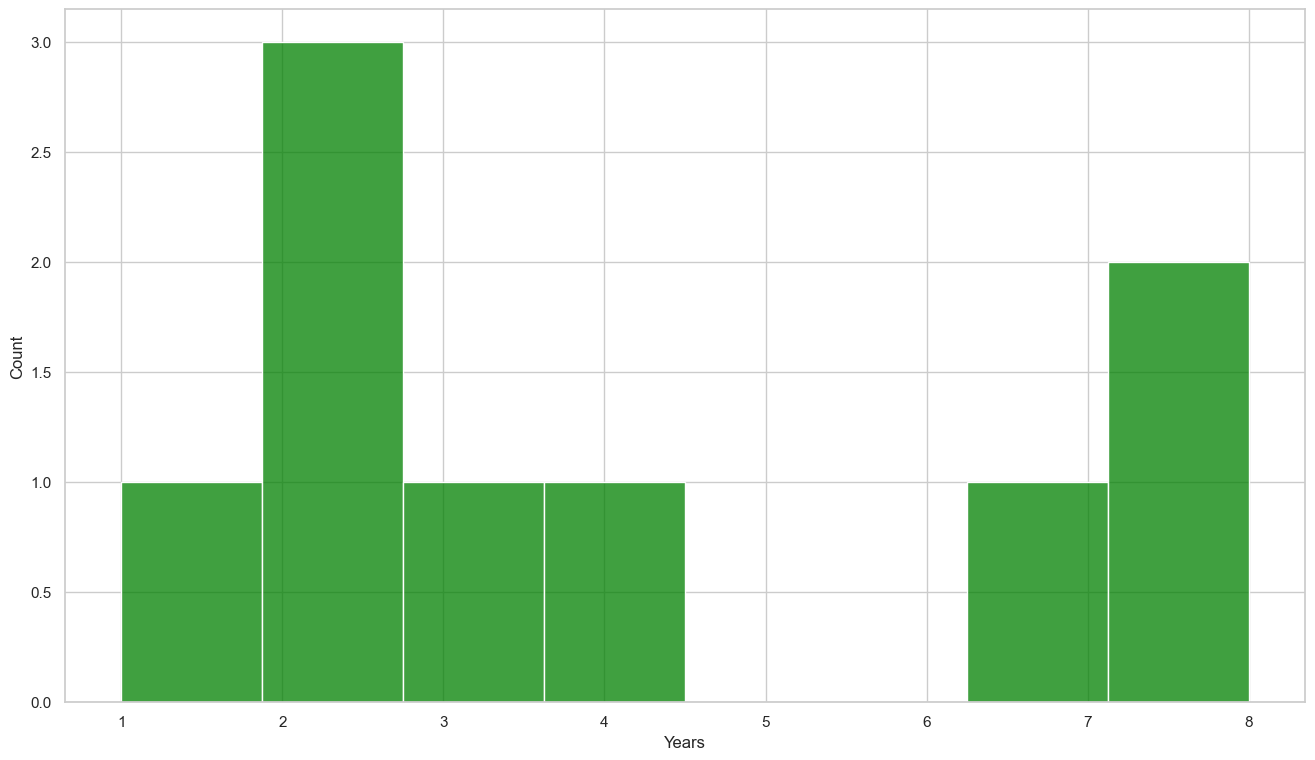

In [29]:
sns.histplot(x=employee["Years"], color="green", bins=8);

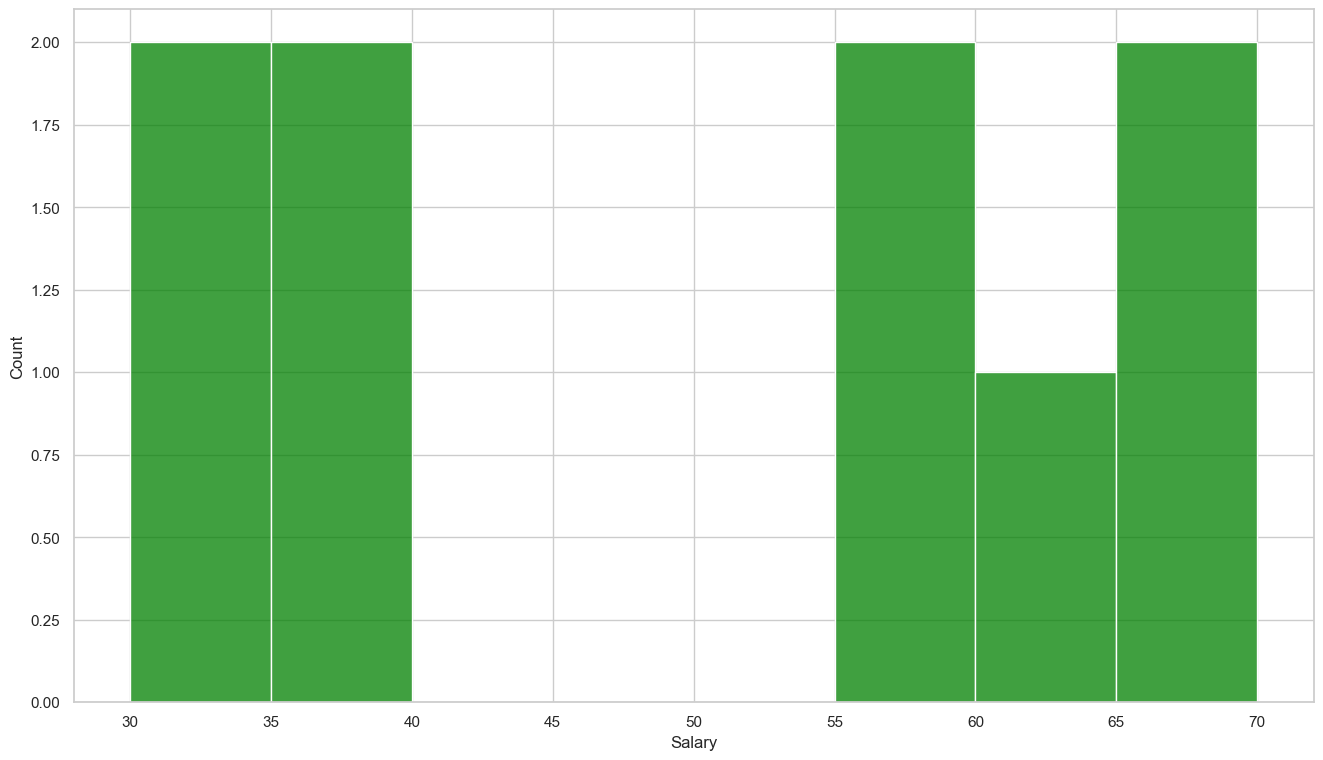

In [31]:
sns.histplot(x=employee["Salary"], color="green", bins=8);

#### What's the average salary in this company?

In [33]:
average_salary = employee["Salary"].mean()
average_salary

48.888888888888886

#### What's the highest salary?

In [34]:
highest_salary = employee["Salary"].max()
highest_salary

70

#### What's the lowest salary?

In [35]:
lowest_salary = employee["Salary"].min()
lowest_salary

30

#### Who are the employees with the lowest salary?

In [37]:
employee[employee["Salary"]==lowest_salary]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [39]:
employee[employee["Name"]=='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [141]:
employee[employee["Name"]=='David']["Salary"]

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [44]:
employee[employee["Title"]=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [46]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [49]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [50]:
employee[(employee["Title"]=='associate') & (employee["Salary"]>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

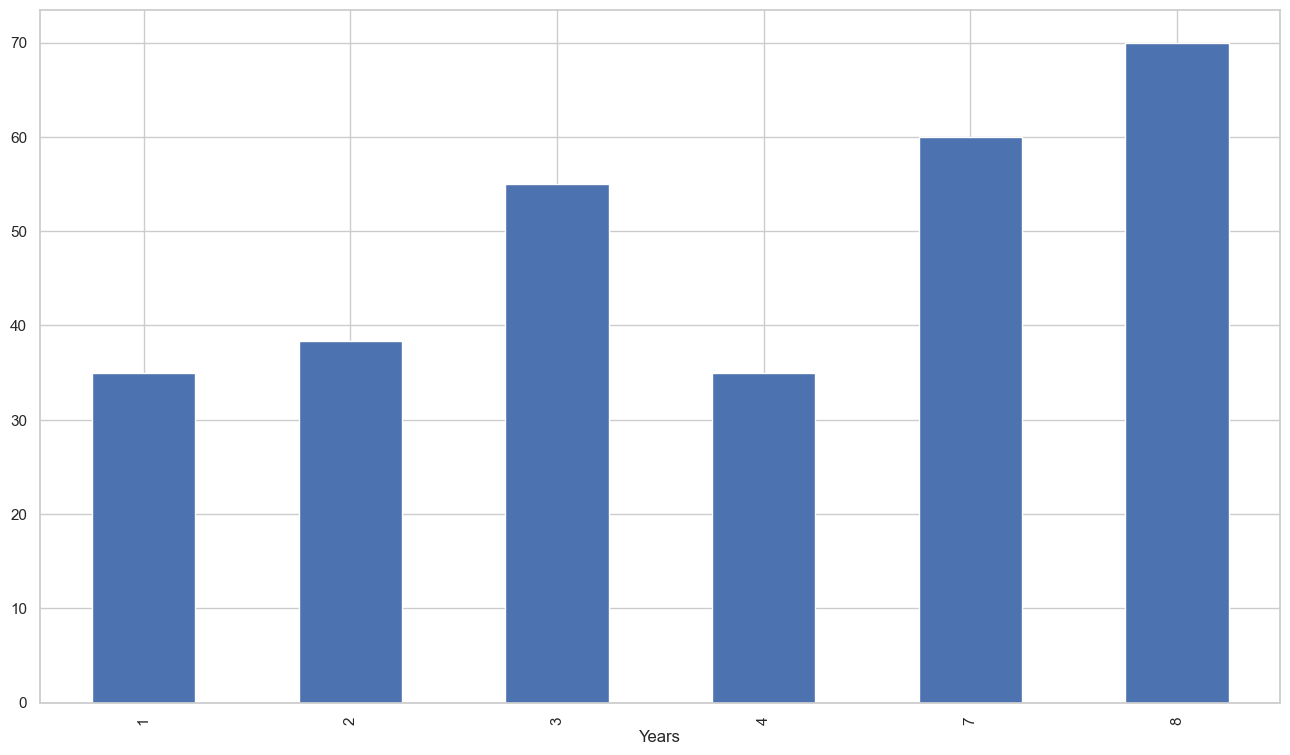

In [142]:
employee.groupby("Years")["Salary"].mean().plot(kind="bar");

####  What is the average Salary per title?

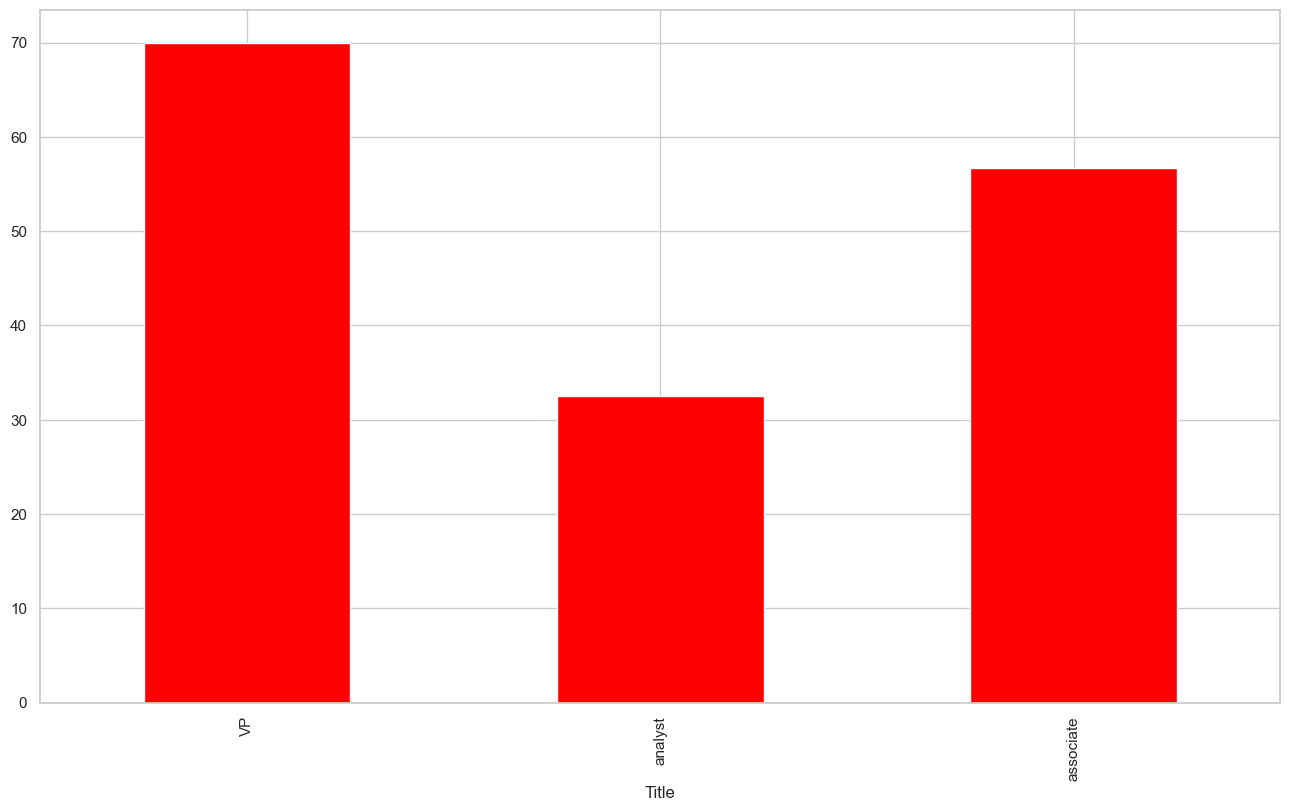

In [55]:
employee.groupby("Title")["Salary"].mean().plot(kind="bar", color="red");

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [ ]:
# Salary

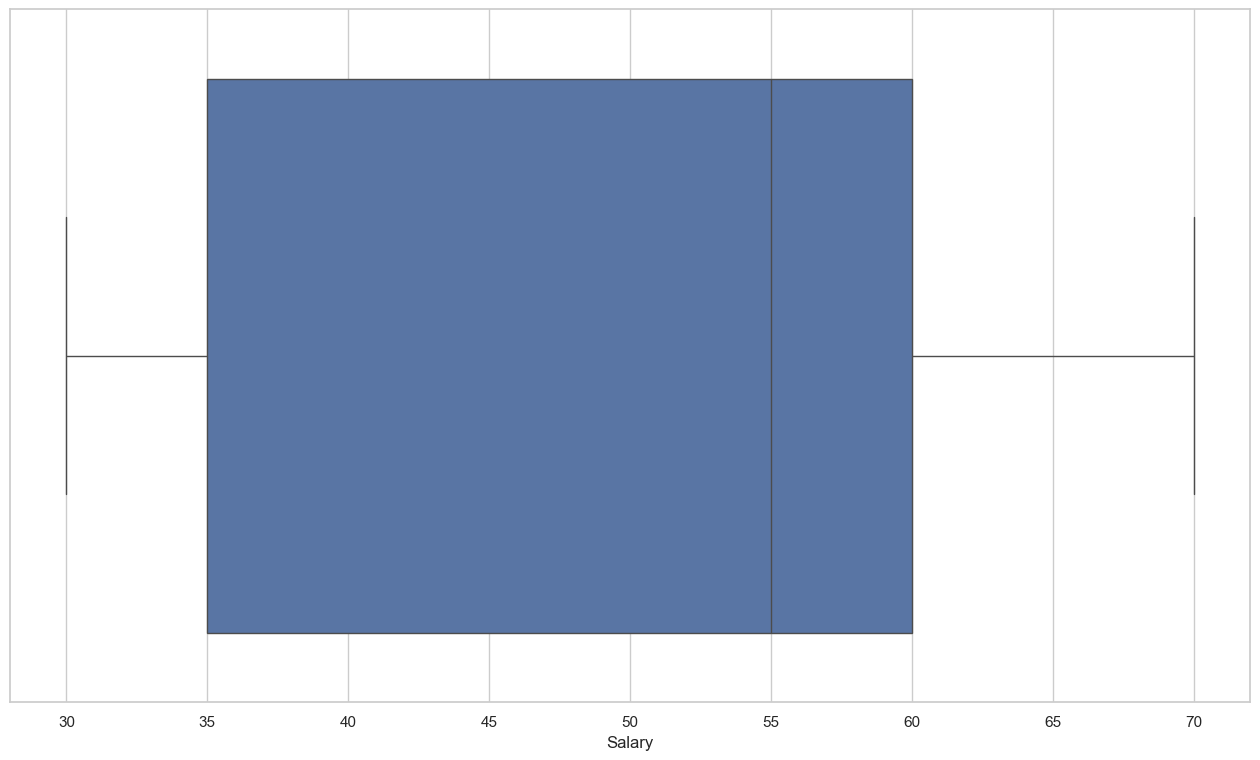

In [180]:
sns.boxplot(x="Salary", data=employee);

In [181]:
employee["Salary"].quantile(0.25) #Q1

35.0

In [182]:
employee["Salary"].quantile(0.75) #Q3

60.0

In [ ]:
# Years

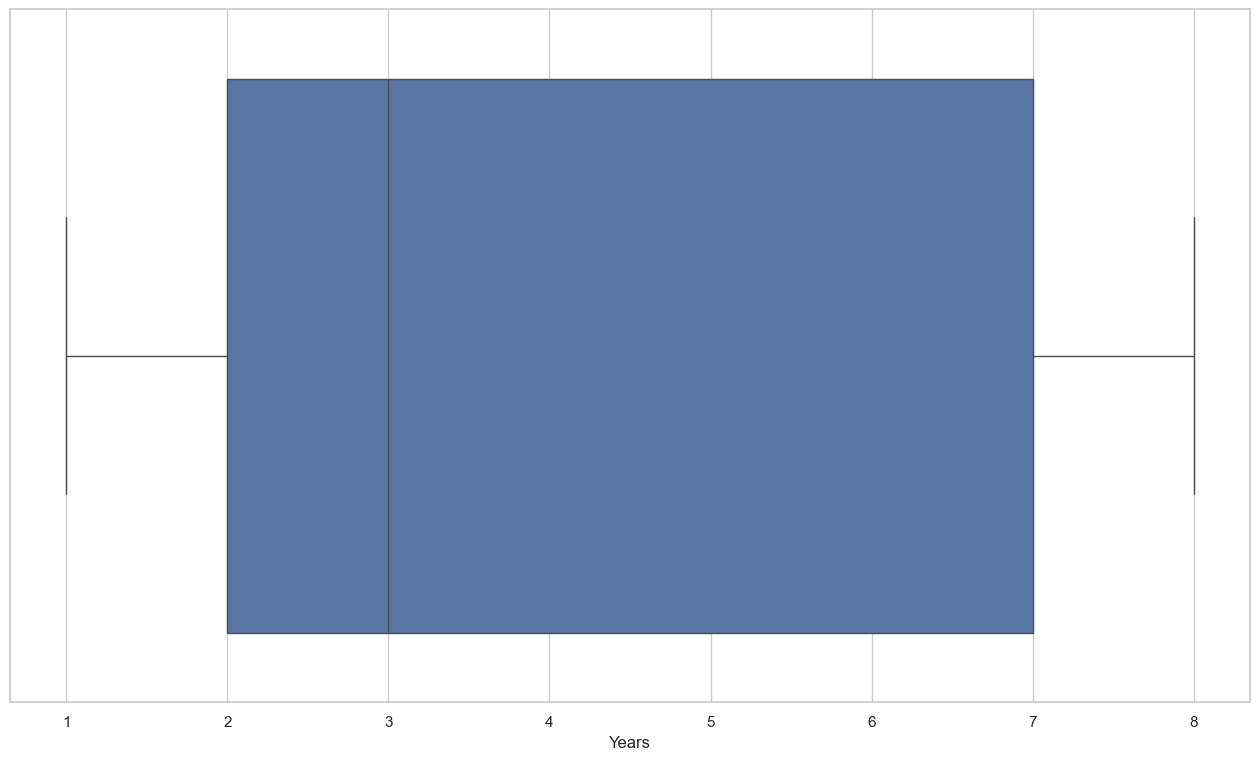

In [179]:
sns.boxplot(x="Years", data=employee);

In [184]:
employee["Years"].quantile(0.25) #Q1

2.0

In [183]:
employee["Years"].quantile(0.75) #Q3

7.0

#### Is the mean salary per gender different?

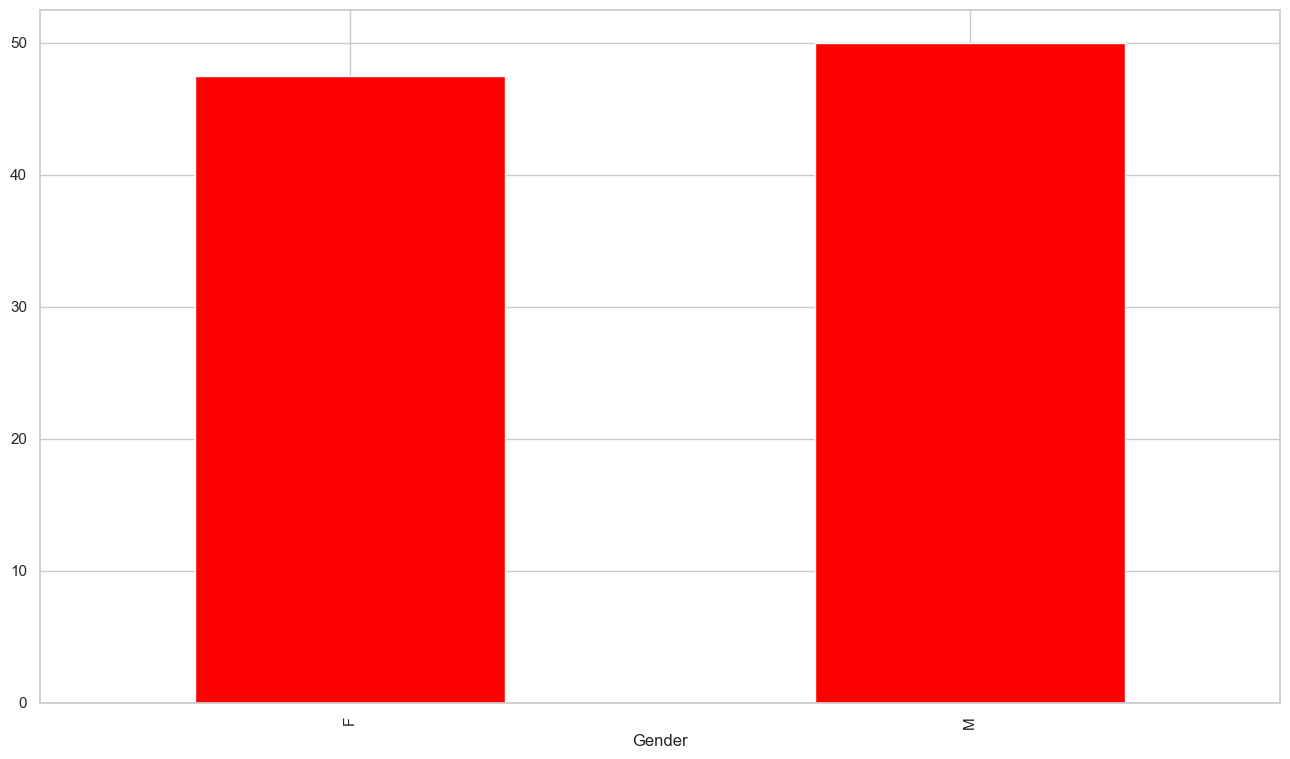

In [128]:
employee.groupby("Gender")["Salary"].mean().plot(kind="bar", color="red");

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [129]:
set(employee["Department"])

{'HR', 'IT', 'Sales'}

In [130]:
employee[employee["Department"]=='HR'].describe()

,Years,Salary
count,3.000000,3.000000
mean,4.666667,45.000000
std,3.055050,21.794495
min,2.000000,30.000000
25%,3.000000,32.500000
50%,4.000000,35.000000
75%,6.000000,52.500000
max,8.000000,70.000000


In [131]:
employee[employee["Department"]=='IT'].describe()

,Years,Salary
count,4.000000,4.00000
mean,4.500000,48.75000
std,3.511885,19.31105
min,1.000000,30.00000
25%,1.750000,33.75000
50%,4.500000,47.50000
75%,7.250000,62.50000
max,8.000000,70.00000


In [132]:
employee[employee["Department"]=='Sales'].describe()

,Years,Salary
count,2.000000,2.0
mean,2.500000,55.0
std,0.707107,0.0
min,2.000000,55.0
25%,2.250000,55.0
50%,2.500000,55.0
75%,2.750000,55.0
max,3.000000,55.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [144]:
IT_dept = employee[employee["Department"]=='IT']
IT_dept["Salary"].max() - IT_dept["Salary"].min()

40

In [145]:
HR_dep = employee[employee["Department"]=='HR']
HR_dep["Salary"].max() - HR_dep["Salary"].min()

40

In [146]:
Sales_dept = employee[employee["Department"]=='Sales']
Sales_dept["Salary"].max() - Sales_dept["Salary"].min()

0

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [58]:
orders =  pd.read_csv("orders/Orders.csv")
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [147]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


####  What is the average Purchase Price?

In [59]:
orders["UnitPrice"].mean()

3.1161744805540756

In [63]:
orders["amount_spent"].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [60]:
orders["UnitPrice"].max()

8142.75

In [61]:
orders["UnitPrice"].min()

0.0

In [64]:
orders["amount_spent"].max()

168469.6

In [65]:
orders["amount_spent"].min()

0.0

#### Select all the customers we have in Spain

In [148]:
orders[orders["Country"]=="Spain"]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


In [80]:
list(orders[orders["Country"]=="Spain"]["CustomerID"].unique())

[12557,
 17097,
 12540,
 12551,
 12484,
 12539,
 12510,
 12421,
 12502,
 12462,
 12507,
 12541,
 12547,
 12597,
 12545,
 12596,
 12354,
 12417,
 12455,
 12450,
 12548,
 12556,
 12550,
 12546,
 12454,
 12448,
 12544,
 12538,
 12445,
 12442]

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [81]:
len(list(orders[orders["Country"]=="Spain"]["CustomerID"].unique()))

30

#### Select all the customers who have bought more than 50 items ?

In [203]:
customer_50 = [customer_id for customer_id,count in orders["CustomerID"].value_counts().items() if count>50]
customer_50

[17841,
 14911,
 14096,
 12748,
 14606,
 15311,
 14646,
 13089,
 13263,
 14298,
 15039,
 14156,
 18118,
 14159,
 14796,
 16033,
 15005,
 14056,
 14769,
 13081,
 16549,
 14527,
 14456,
 17511,
 15719,
 15555,
 16931,
 17811,
 14505,
 18283,
 17338,
 17757,
 12921,
 12415,
 16904,
 15159,
 16764,
 17675,
 13137,
 15547,
 17920,
 17735,
 16923,
 15529,
 16241,
 16360,
 16729,
 15856,
 12681,
 13969,
 16713,
 14502,
 13230,
 14415,
 14088,
 16686,
 14194,
 17611,
 14667,
 13098,
 13694,
 17238,
 15023,
 17602,
 15993,
 15358,
 16910,
 15861,
 17337,
 17231,
 12867,
 12682,
 14367,
 14534,
 15356,
 17059,
 15498,
 15033,
 15998,
 14730,
 17346,
 14895,
 14049,
 17954,
 15640,
 17139,
 13408,
 12540,
 13319,
 16161,
 17315,
 15021,
 18041,
 17220,
 13668,
 18069,
 17365,
 12621,
 15867,
 12471,
 16558,
 13018,
 15044,
 14085,
 16813,
 16746,
 16712,
 12567,
 18109,
 13451,
 15078,
 17581,
 13268,
 13521,
 18102,
 13069,
 12474,
 13097,
 14562,
 15615,
 13488,
 14684,
 12433,
 12841,
 17377,


#### Select orders from Spain that are above 50 items

In [205]:
spain_orders = orders[orders["Country"]=='Spain']
orders_50 = [order_id for order_id,count in spain_orders["InvoiceNo"].value_counts().items() if count>50]
orders_50

[564734,
 573362,
 540469,
 542303,
 540550,
 559665,
 574550,
 557007,
 550911,
 567653,
 572065,
 581193]

#### Select all free orders

In [87]:
orders[orders["amount_spent"]==0]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [212]:
lunchbox_orders = orders[orders['Description'].str.contains('lunch box')]
lunchbox_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
35,35,536370,22629,2010,12,3,8,spaceboy lunch box,24,2010-12-01 08:45:00,1.95,12583,France,46.8
36,36,536370,22659,2010,12,3,8,lunch box i love london,24,2010-12-01 08:45:00,1.95,12583,France,46.8
37,37,536370,22631,2010,12,3,8,circus parade lunch box,24,2010-12-01 08:45:00,1.95,12583,France,46.8
94,94,536378,21559,2010,12,3,9,strawberry lunch box with cutlery,6,2010-12-01 09:37:00,2.55,14688,United Kingdom,15.3
95,95,536378,22352,2010,12,3,9,lunch box with cutlery retrospot,6,2010-12-01 09:37:00,2.55,14688,United Kingdom,15.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396706,539013,581425,22659,2011,12,4,15,lunch box i love london,2,2011-12-08 15:31:00,1.95,14796,United Kingdom,3.9
397348,540318,581476,22631,2011,12,5,8,circus parade lunch box,12,2011-12-09 08:48:00,1.95,12433,Norway,23.4
397496,541200,581494,21559,2011,12,5,10,strawberry lunch box with cutlery,6,2011-12-09 10:13:00,2.55,12518,Germany,15.3
397909,541894,581587,22631,2011,12,5,12,circus parade lunch box,12,2011-12-09 12:50:00,1.95,12680,France,23.4


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [213]:
lunchbox_orders[lunchbox_orders['year']==2011]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26440,42779,540021,22630,2011,1,2,12,dolly girl lunch box,1,2011-01-04 12:51:00,1.95,17841,United Kingdom,1.95
27110,44171,540157,21559,2011,1,3,11,strawberry lunch box with cutlery,6,2011-01-05 11:41:00,2.55,15311,United Kingdom,15.30
27111,44172,540157,21561,2011,1,3,11,dinosaur lunch box with cutlery,3,2011-01-05 11:41:00,2.55,15311,United Kingdom,7.65
27112,44173,540157,21558,2011,1,3,11,skull lunch box with cutlery,1,2011-01-05 11:41:00,2.55,15311,United Kingdom,2.55
27113,44174,540157,22352,2011,1,3,11,lunch box with cutlery retrospot,1,2011-01-05 11:41:00,2.55,15311,United Kingdom,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396706,539013,581425,22659,2011,12,4,15,lunch box i love london,2,2011-12-08 15:31:00,1.95,14796,United Kingdom,3.90
397348,540318,581476,22631,2011,12,5,8,circus parade lunch box,12,2011-12-09 08:48:00,1.95,12433,Norway,23.40
397496,541200,581494,21559,2011,12,5,10,strawberry lunch box with cutlery,6,2011-12-09 10:13:00,2.55,12518,Germany,15.30
397909,541894,581587,22631,2011,12,5,12,circus parade lunch box,12,2011-12-09 12:50:00,1.95,12680,France,23.40


#### Show the frequency distribution of the amount spent in Spain.

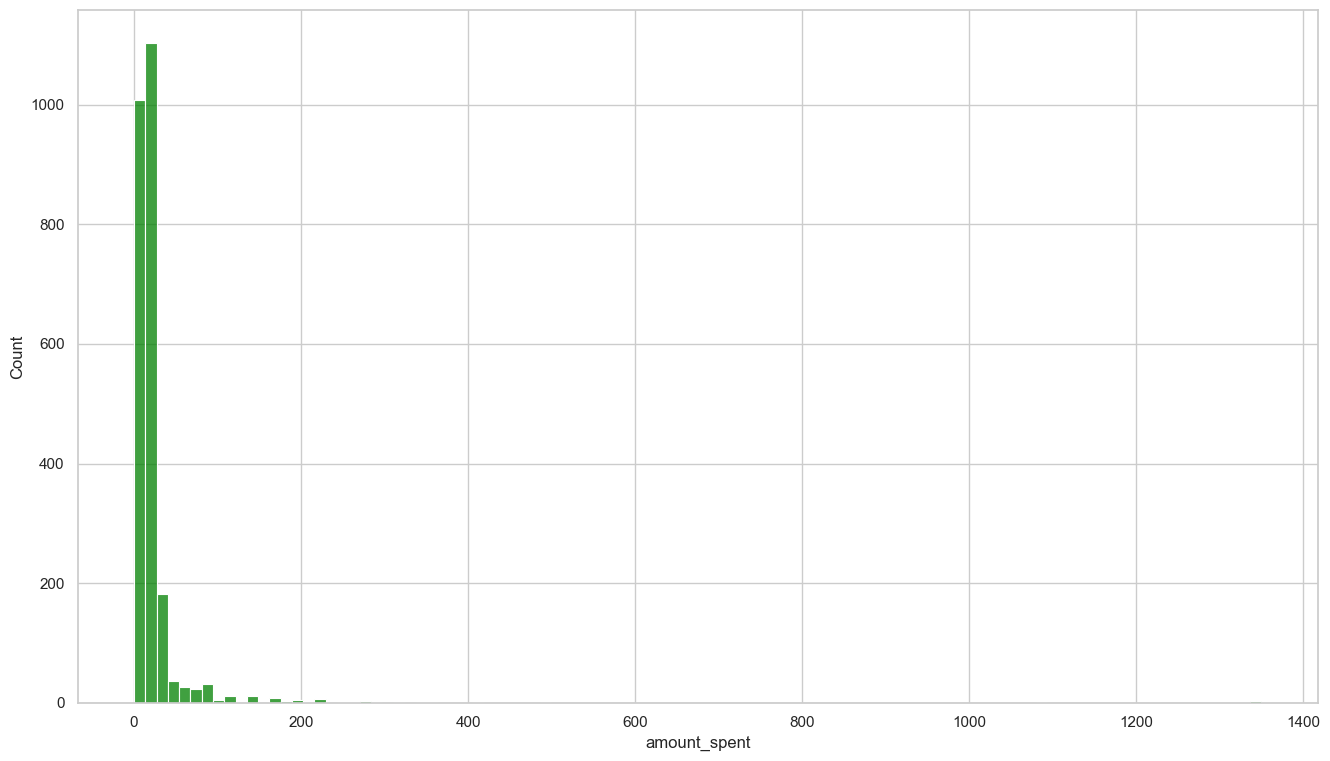

In [162]:
spain = orders[orders["Country"]=='Spain']
sns.histplot(x=spain["amount_spent"], color="green", bins=100);

#### Select all orders made in the month of August

In [89]:
orders[orders["month"]==8]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [166]:
orders[orders["month"]==8]["month"].value_counts()

month
8    27013
Name: count, dtype: int64

#### What's the  average amount of money spent by country

In [168]:
orders.groupby("Country")["amount_spent"].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [170]:
max_UnitPrice = orders["UnitPrice"].max()
orders[orders["UnitPrice"]==max_UnitPrice]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [176]:
orders.groupby("year").aggregate("amount_spent").mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64